In [84]:
library(Seurat)
library(dplyr)
library(ggplot2)

In [85]:
# ============================================================
# 1. Load integrated object
# ============================================================
combined <- readRDS("/mnt/home3/miska/nm667/scratch/inProgress/dev/data/Psoriasis_data/GSE228421_integrated_paper_faithful.rds")



In [86]:

#DefaultAssay(combined) <- "integrated"
DefaultAssay(combined) <- "SCT"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



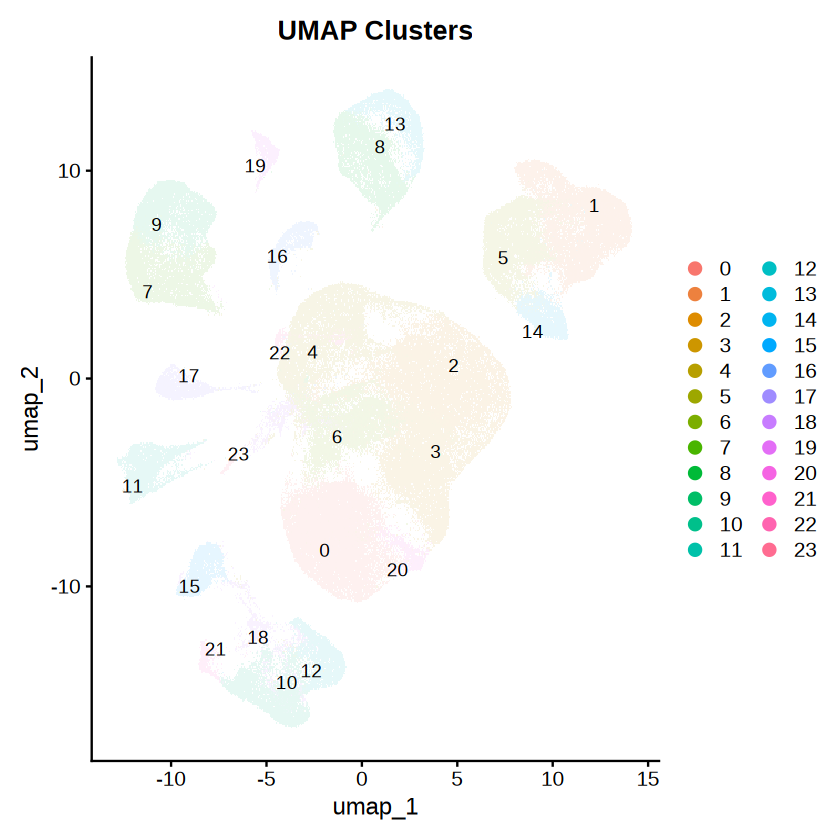

In [87]:
# UMAP with clusters (labels)
DimPlot(combined, reduction = "umap", group.by = "seurat_clusters", 
        label = TRUE, repel = TRUE, pt.size = 0.1) +
  ggtitle("UMAP Clusters")

In [88]:



# ============================================================
# 2. Marker lists exactly from the psoriasis paper
# ============================================================

markers <- list(

  # ---------------------------
  # KERATINOCYTES
  # ---------------------------
  KC_Basal     = c("KRT14","KRT5","TP63"),
  KC_Suprabasal = c("KRT1","KRT10","KRTDAP"),
  KC_Prolif    = c("MKI67","TOP2A","PCNA"),
  KC_IFN       = c("IFI6","IFIT1","ISG15","CXCL10","CXCL9"),

  # ---------------------------
  # FIBROBLASTS
  # ---------------------------
  Fibroblast_Dermal    = c("COL1A1","COL1A2","DCN","LUM"),
  Fibroblast_Inflamm   = c("CXCL9","CXCL10","CXCL11","TNFSF11"),
  Fibroblast_PRG4      = c("PRG4"),
  Fibroblast_SFRP2     = c("SFRP2"),
  Fibroblast_Prolif    = c("MKI67","TOP2A"),

  # ---------------------------
  # T CELLS
  # ---------------------------
  T_CD4    = c("CD3D","CD4","IL7R","CCR7"),
  T_CD8    = c("CD3D","CD8A","GZMB","GNLY","NKG7"),
  T_Treg   = c("FOXP3","IL2RA"),
  T_Gd     = c("TRDC","TRGC1","TRGC2"),
  NK       = c("KLRD1","NKG7","PRF1"),

  # ---------------------------
  # MYELOID / DC
  # ---------------------------
  Macrophage = c("C1QA","C1QB","C1QC"),
  Monocyte   = c("LYZ","S100A8","S100A9"),
  cDC1       = c("CLEC9A","XCR1"),
  cDC2       = c("CD1C","FCER1A"),
  pDC        = c("GZMB","IRF7"),

  # ---------------------------
  # ENDOTHELIAL
  # ---------------------------
  Endothelial_Blood = c("VWF","PECAM1"),
  Endothelial_Lymph = c("PROX1","PDPN"),

  # ---------------------------
  # MISCELLANEOUS
  # ---------------------------
  Melanocyte = c("PMEL","MLANA","TYRP1"),
  Mast       = c("TPSAB1","CPA3","KIT")
)


In [89]:

# ============================================================
# 3. Compute score per cluster for each marker set
# ============================================================
clusters <- levels(combined$seurat_clusters)

marker_scores <- sapply(markers, function(g){
  sapply(clusters, function(cl){
    cells <- WhichCells(combined, idents = cl)
    if (length(cells) == 0) return(0)
    mean(GetAssayData(combined, slot="data")[intersect(g, rownames(combined)), cells], na.rm = TRUE)
  })
})

marker_scores <- as.data.frame(marker_scores)
marker_scores$Cluster <- clusters

write.csv(marker_scores, "cluster_marker_scores_psoriasis_paper.csv", row.names = FALSE)


In [90]:

# ============================================================
# 4. Auto-annotate: assign highest-scoring marker set
# ============================================================
auto_labels <- apply(marker_scores[, -ncol(marker_scores)], 1, function(row){
  names(row)[which.max(row)]
})

annotation_table <- data.frame(
  Cluster = clusters,
  AssignedType = auto_labels
)

write.csv(annotation_table, "cluster_annotations_auto.csv", row.names = FALSE)


In [91]:
unique(combined$seurat_clusters)


[1] 4  1  6  20 7  0  19 3  13 2  17 11 5  15 8  9  18 10 16 12 14 21 23 22
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23

In [92]:
auto_labels

0                   1                   2                   3 
         "KC_Basal" "Fibroblast_Dermal"     "KC_Suprabasal"          "KC_Basal" 
                  4                   5                   6                   7 
    "KC_Suprabasal" "Fibroblast_Dermal"     "KC_Suprabasal" "Endothelial_Blood" 
                  8                   9                  10                  11 
    "KC_Suprabasal" "Endothelial_Blood"          "Monocyte"     "KC_Suprabasal" 
                 12                  13                  14                  15 
       "Macrophage"     "KC_Suprabasal" "Fibroblast_Dermal"          "Monocyte" 
                 16                  17                  18                  19 
             "Mast"        "Melanocyte"          "Monocyte" "Endothelial_Lymph" 
                 20                  21                  22                  23 
         "KC_Basal"          "Monocyte"     "KC_Suprabasal"               "pDC"

In [93]:
table(combined$seurat_clusters %in% names(auto_labels))



  TRUE 
193678 

In [94]:
head(combined$seurat_clusters)
head(auto_labels)


AAACCCAAGGACACTG-1_GSM7120449_P1_V1_L AAACCCAAGTGCCGAA-1_GSM7120449_P1_V1_L 
                                    4                                     1 
AAACCCACACCAGACC-1_GSM7120449_P1_V1_L AAACCCAGTAGGGTAC-1_GSM7120449_P1_V1_L 
                                    4                                     6 
AAACCCAGTATTCCGA-1_GSM7120449_P1_V1_L AAACCCAGTGCATTTG-1_GSM7120449_P1_V1_L 
                                    1                                     6 
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23

0                   1                   2                   3 
         "KC_Basal" "Fibroblast_Dermal"     "KC_Suprabasal"          "KC_Basal" 
                  4                   5 
    "KC_Suprabasal" "Fibroblast_Dermal"

In [95]:

# Ensure clusters are characters
combined$seurat_clusters <- as.character(combined$seurat_clusters)
# ============================================================
# 5. Add annotation to metadata
# ============================================================
# auto_labels is a named vector: names(auto_labels) = cluster IDs (e.g. "0", "1", "2" ...)
# combined$seurat_clusters is a vector of same cluster IDs per cell
# 1. Build per-cell annotation
paper_annotation_per_cell <- auto_labels[ combined$seurat_clusters ]

# 2. Rename the vector so that its names = the cell barcodes
names(paper_annotation_per_cell) <- colnames(combined)

# 3. Add to Seurat object
combined$paper_annotation <- paper_annotation_per_cell




In [96]:
table(combined$paper_annotation, combined$seurat_clusters)


                   
                        0     1    10    11    12    13    14    15    16    17
  Endothelial_Blood     0     0     0     0     0     0     0     0     0     0
  Endothelial_Lymph     0     0     0     0     0     0     0     0     0     0
  Fibroblast_Dermal     0 19303     0     0     0     0  4109     0     0     0
  KC_Basal          25302     0     0     0     0     0     0     0     0     0
  KC_Suprabasal         0     0     0  5926     0  4557     0     0     0     0
  Macrophage            0     0     0     0  4667     0     0     0     0     0
  Mast                  0     0     0     0     0     0     0     0  3904     0
  Melanocyte            0     0     0     0     0     0     0     0     0  3497
  Monocyte              0     0  7450     0     0     0     0  4090     0     0
  pDC                   0     0     0     0     0     0     0     0     0     0
                   
                       18    19     2    20    21    22    23     3     4     5


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



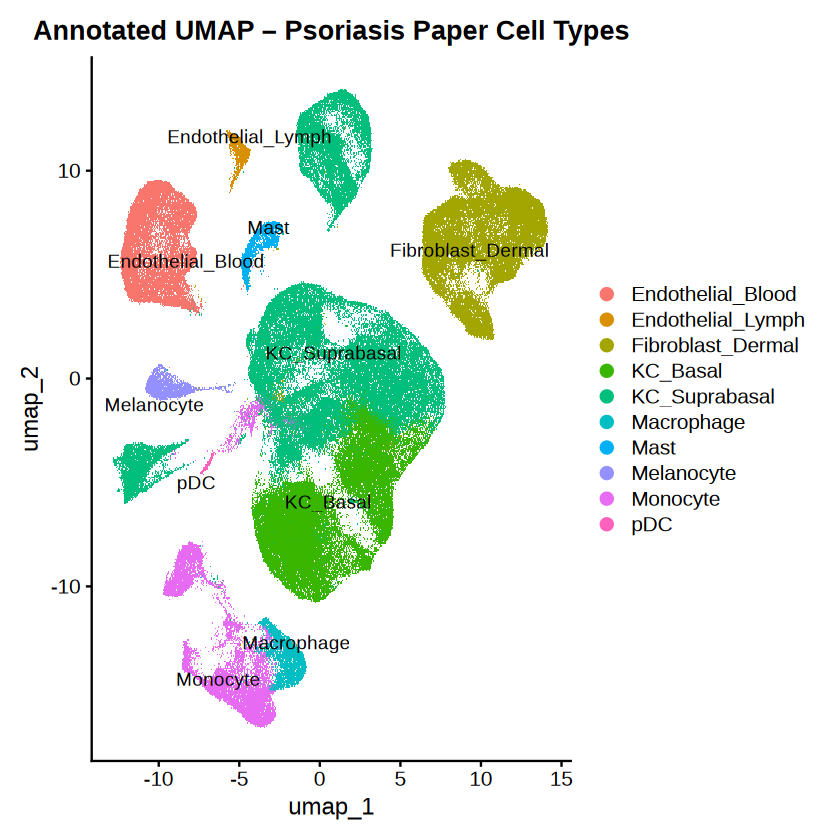

In [97]:

# ============================================================
# 6. UMAP colored by annotated type
# ============================================================
p <- DimPlot(
  combined,
  group.by = "paper_annotation",
  reduction = "umap",
  label = TRUE,
  repel = TRUE
) + ggtitle("Annotated UMAP – Psoriasis Paper Cell Types")

ggsave("UMAP_annotated_psoriasis_paper.png", p, width = 10, height = 8, dpi = 300)

p


In [98]:

# ============================================================
# 7. Save updated object
# ============================================================
saveRDS(combined, "/mnt/home3/miska/nm667/scratch/inProgress/dev/data/Psoriasis_data/GSE228421_integrated_annotated.rds")

message("Annotation completed successfully.")


Annotation completed successfully.



In [100]:
head(combined@meta.data)



,orig.ident,nCount_RNA,nFeature_RNA,sample_id,gsm_id,donor,visit,site,timepoint,dissociation_day,percent.mt,S.Score,G2M.Score,Phase,cell_cycle_diff,nCount_SCT,nFeature_SCT,integrated_snn_res.0.4,seurat_clusters,paper_annotation
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<fct>,<chr>,<chr>
AAACCCAAGGACACTG-1_GSM7120449_P1_V1_L,GSE228421_raw,6501,1531,GSM7120449_P1_V1_L,GSM7120449,P1,V1,lesional,day0,NA,5.460698,-0.064406062,-0.03278137,G1,0.03162469,4572,1493,4,4,KC_Suprabasal
AAACCCAAGTGCCGAA-1_GSM7120449_P1_V1_L,GSE228421_raw,811,396,GSM7120449_P1_V1_L,GSM7120449,P1,V1,lesional,day0,NA,3.699137,0.017481336,-0.07118476,S,-0.08866610,3368,566,1,1,Fibroblast_Dermal
AAACCCACACCAGACC-1_GSM7120449_P1_V1_L,GSE228421_raw,2096,755,GSM7120449_P1_V1_L,GSM7120449,P1,V1,lesional,day0,NA,9.780534,0.130481889,-0.08050236,S,-0.21098425,3796,766,4,4,KC_Suprabasal
AAACCCAGTAGGGTAC-1_GSM7120449_P1_V1_L,GSE228421_raw,1301,509,GSM7120449_P1_V1_L,GSM7120449,P1,V1,lesional,day0,NA,1.767871,0.055162025,-0.06294454,S,-0.11810656,3694,586,6,6,KC_Suprabasal
AAACCCAGTATTCCGA-1_GSM7120449_P1_V1_L,GSE228421_raw,5518,1538,GSM7120449_P1_V1_L,GSM7120449,P1,V1,lesional,day0,NA,1.395433,-0.061088364,-0.04016726,G1,0.02092110,4548,1537,1,1,Fibroblast_Dermal
AAACCCAGTGCATTTG-1_GSM7120449_P1_V1_L,GSE228421_raw,4277,1278,GSM7120449_P1_V1_L,GSM7120449,P1,V1,lesional,day0,NA,1.893851,-0.009597205,0.03749427,G2M,0.04709148,4217,1278,6,6,KC_Suprabasal
